In [195]:
using Pkg; Pkg.activate(".")
using Revise 
using ClimaAnalysis
using ClimaAtmos
import YAML
using Plots
import Glob
using CairoMakie
import ClimaAnalysis.Visualize as viz
import ClimaAnalysis.Utils: kwargs

  Activating project at `~/Documents/Research/loss/ClimaAtmos.jl/calibration/experiments/reanalysis_forcing`


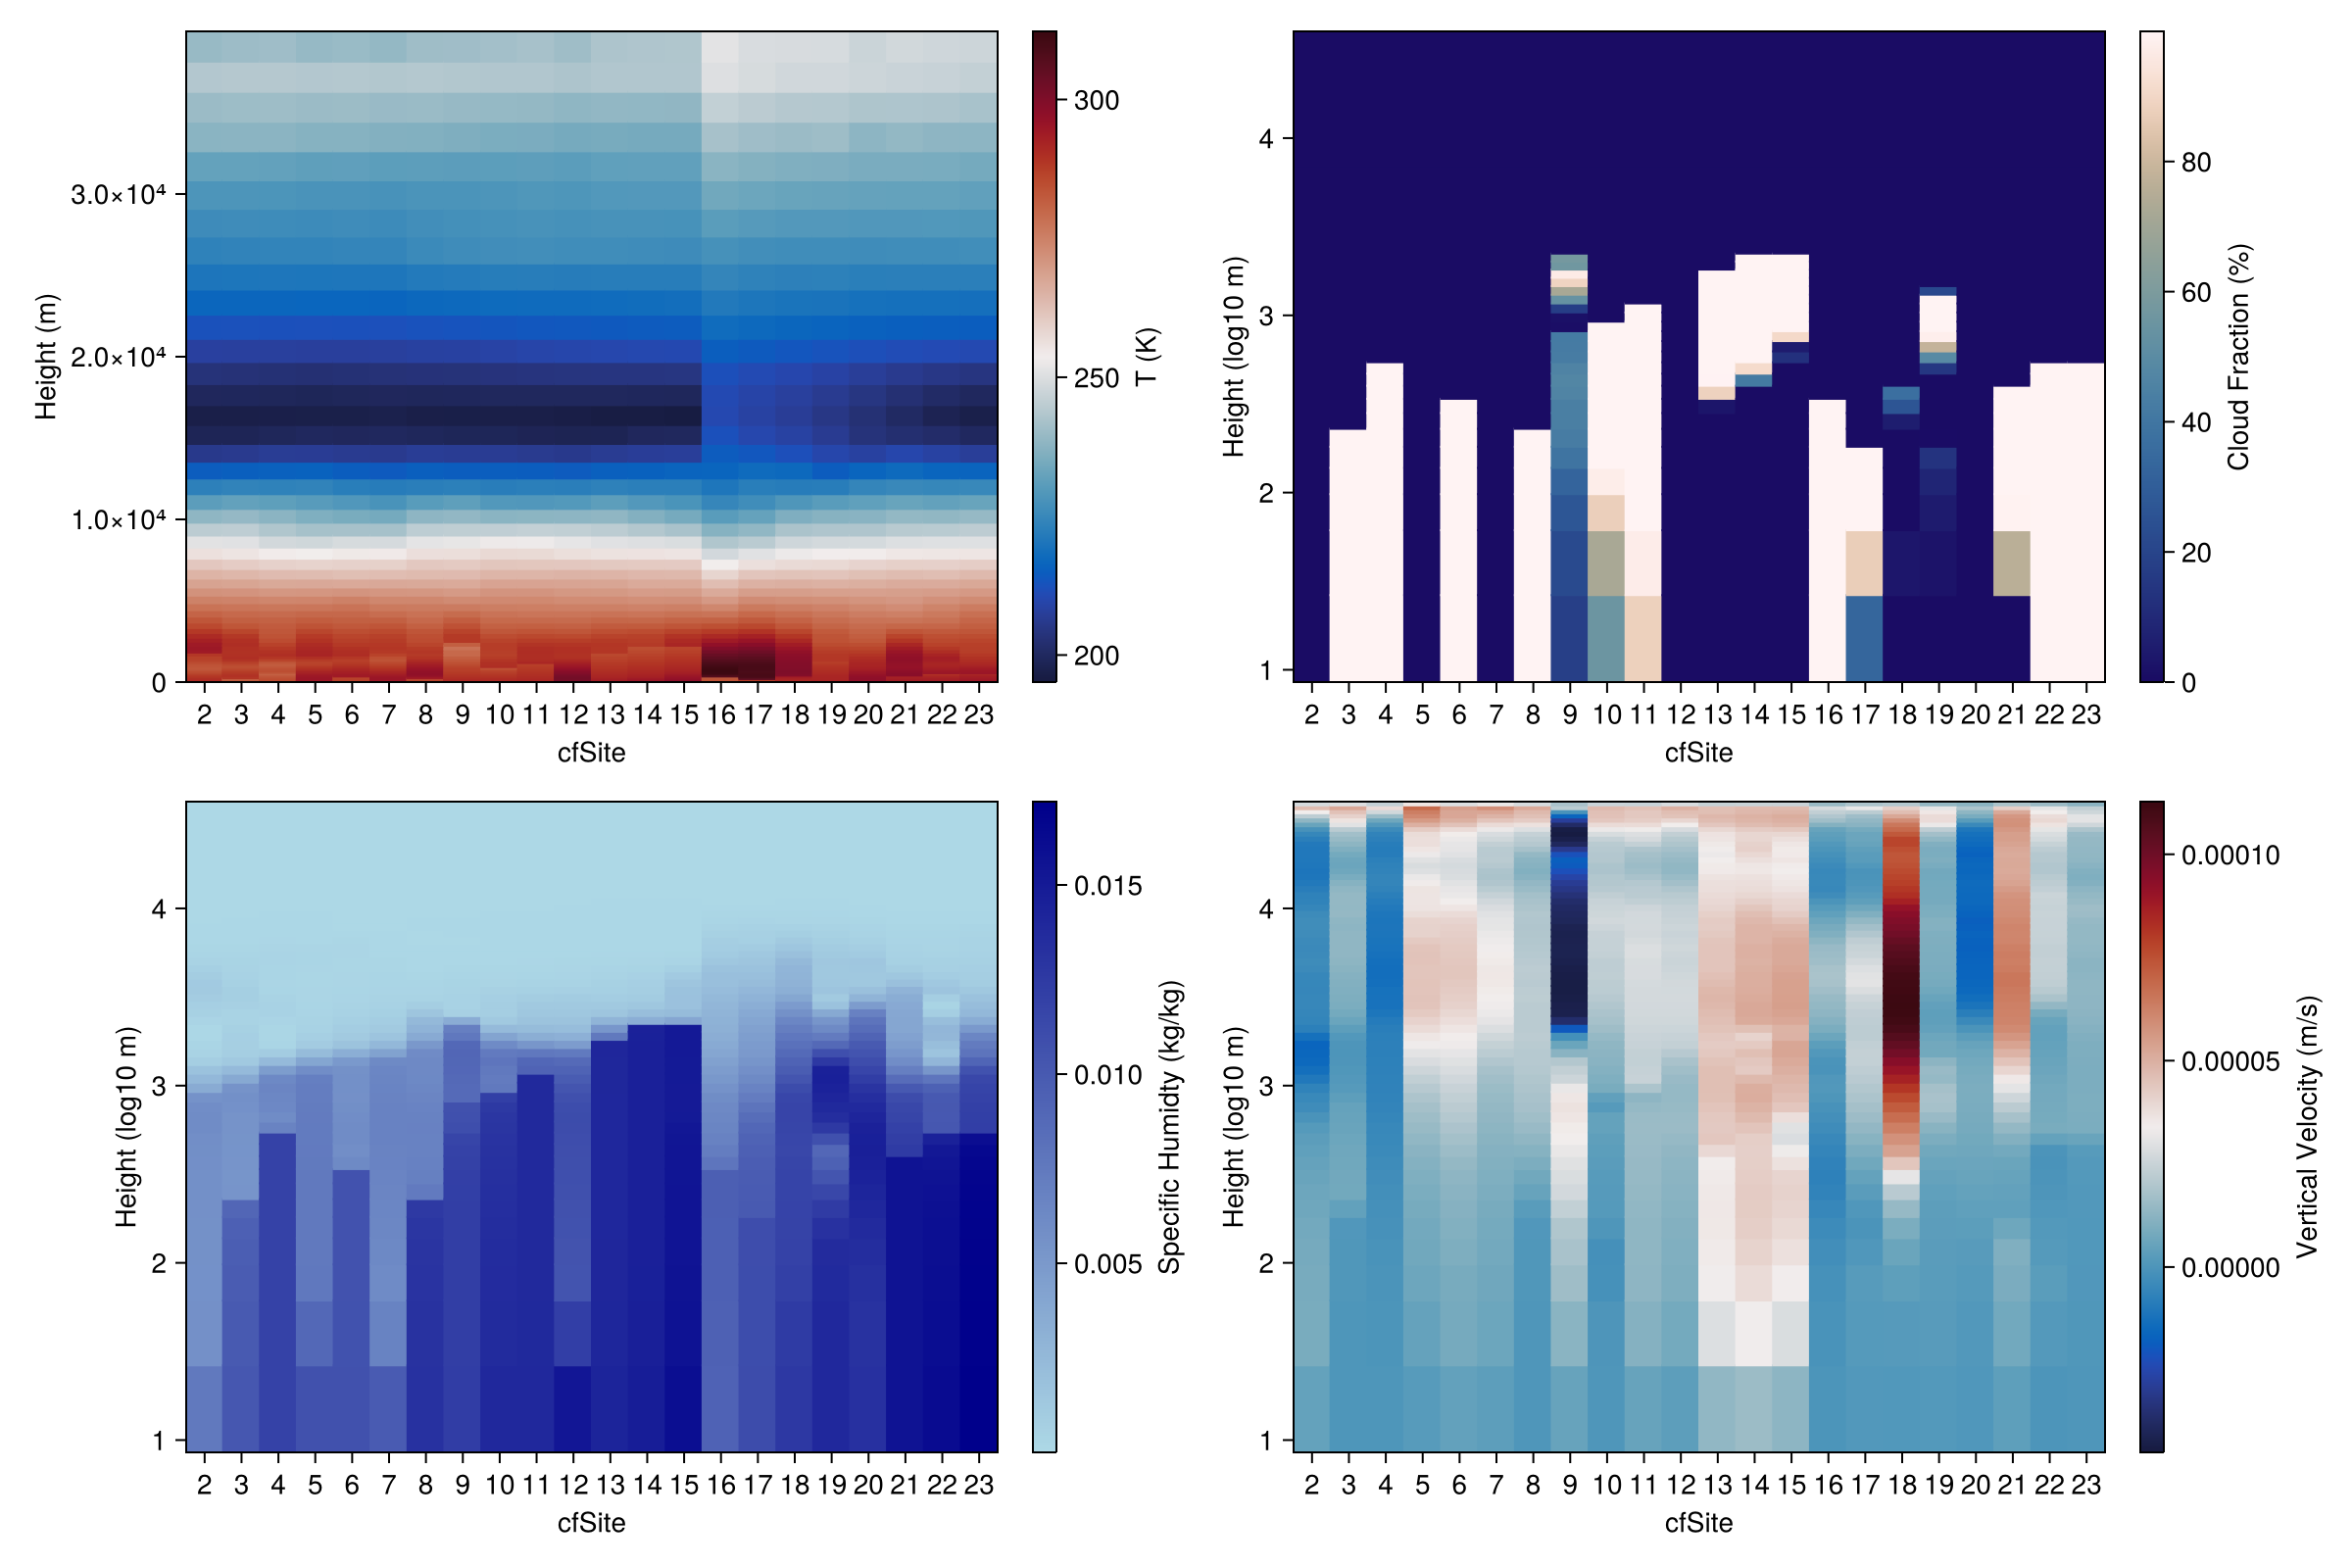

In [120]:
#fpaths = Glob.glob("output/era5_driven/*/output_active/")
# fig = CairoMakie.Figure()
# viz.plot!(fig, da, more_kwargs = Dict(:axis => kwargs(dim_on_y = true, yscale = log10)))
function cfdata(var)
    data = []
    z = nothing
    for site in 2:23            
        simdir = SimDir("output/era5_driven/site$site/output_active/")
        da = get(simdir; short_name = var)
        da = window(da, "time", left = 100 * 3600, right = 150 * 3600)
        da = average_time(da)
        da = slice(da, x = 0, y = 0)
        push!(data, da.data)
        if site ==2 
            z = da.dims["z"]
        end
    end
    return transpose(hcat(data...)), z
end

# data = []
# for site in 2:23
#     simdir = SimDir("output/era5_driven/site$site/output_active/")
#     da = get(simdir; short_name = "cl")
#     da = window(da, "time", left = 100 * 3600, right = 150 * 3600)
#     da = average_time(da)
#     da = slice(da, x = 0, y = 0)
#     push!(data, da.data)
# end

# da = get(SimDir("output/era5_driven/site2/output_active/"); short_name = "ta")
# da.dims
# # fig

# CairoMakie.heatmap(transpose(hcat(data...)))


fig = Figure(size = (1200, 800))
ax = Axis(fig[1, 1],
    xlabel = "cfSite",
    ylabel = "Height (m)",
    #yscale = log10,  # Set y-axis to log scale
    xticks = (2:23)  # Label x-axis with site numbers
)
t_dat, z = cfdata("ta")

# Plot the data (transpose since you want z as vertical and sites as horizontal)
hm = heatmap!(ax, 2:23, z, t_dat, colormap = :balance)

# Add colorbar
Colorbar(fig[1, 2], hm, label = "T (K)")

ax = Axis(fig[1, 3],
    xlabel = "cfSite",
    ylabel = "Height (log10 m)",
    xticks = (2:23)  # Label x-axis with site numbers
)

cl_dat, z = cfdata("cl")
hm = heatmap!(ax, 2:23, log10.(z), cl_dat, colormap = :lapaz)
Colorbar(fig[1, 4], hm, label = "Cloud Fraction (%)")

ax = Axis(fig[2, 1],
    xlabel = "cfSite",
    ylabel = "Height (log10 m)",
    xticks = (2:23)  # Label x-axis with site numbers
)

hus_dat, z = cfdata("hus")
hm = heatmap!(ax, 2:23, log10.(z), hus_dat, colormap = :blues)
Colorbar(fig[2,2], hm, label = "Specific Humidty (kg/kg)")

ax = Axis(fig[2, 3],
    xlabel = "cfSite",
    ylabel = "Height (log10 m)",
    xticks = (2:23)  # Label x-axis with site numbers
)

wa_dat, z = cfdata("wa")
hm = heatmap!(ax, 2:23, log10.(z), wa_dat, colormap = :balance)
Colorbar(fig[2,4], hm, label = "Vertical Velocity (m/s)")



# Display the plot
fig

In [ ]:
# let's repeat the above but for 1D variables

In [113]:
println(summary(SimDir("output/era5_driven/site23/output_active/")))

Output directory: output/era5_driven/site23/output_active/
Variables:
- rhoa
    inst (10m)
- taen
    inst (10m)
- pr
    inst (10m)
- waup
    inst (10m)
- hurvi
    inst (10m)
- wa
    inst (10m)
- prw
    inst (10m)
- clivi
    inst (10m)
- clwvi
    inst (10m)
- ua
    inst (10m)
- cli
    inst (10m)
- thetaaup
    inst (10m)
- hussfc
    inst (10m)
- tke
    max (10m)
    inst (10m)
- edt
    inst (10m)
- rlut
    inst (10m)
- thetaa
    inst (10m)
- evu
    inst (10m)
- husup
    inst (10m)
- detr
    inst (10m)
- arup
    inst (10m)
- strain
    inst (10m)
- hur
    inst (10m)
- rsutcs
    inst (10m)
- bgrad
    inst (10m)
- lmix
    inst (10m)
- cl
    inst (10m)
- hus
    inst (10m)
- rsut
    inst (10m)
- haup
    inst (10m)
- taup
    inst (10m)
- cliup
    inst (10m)
- entr
    inst (10m)
- thetaaen
    inst (10m)
- ta
    inst (10m)
- husv
    inst (10m)
- ha
    inst (10m)
- clvi
    inst (10m)
- clwup
    inst (10m)
- dsevi
    inst (10m)
- haen
    inst (10m)
- evspsbl

In [ ]:
import ClimaAtmos as CA
import YAML
using ClimaCore: Fields
using Plots

function find_delta(z, threshold = 2000)
    index = findall(x -> x > threshold, parent(z)[:, 1,1,1,1])[1]
    return round(parent(z)[:, 1,1,1,1][index] - parent(z)[:, 1,1,1,1][index - 1])
end

In [180]:
z_elem = 100
dz_bottom = 100
config_dict = YAML.load_file("prognostic_edmfx_gcmdriven_column.yml")
config_dict["z_elem"] = z_elem
config_dict["dz_bottom"] = dz_bottom
config = CA.AtmosConfig(config_dict; job_id = "resolution_test")
simulation = CA.get_simulation(config);
(; integrator) = simulation;
z = Fields.coordinate_field(integrator.u.c).z;
z

[ Info: Running on CPUSingleThreaded.
[ Info: Setting up single-process ClimaAtmos run
[ Info: Running ClimaCore in unthreaded mode.
┌ Info: Making AtmosConfig with config files: 
└    /Users/julianschmitt/Documents/Research/loss/ClimaAtmos.jl/src/solver/../../config/default_configs/default_config.yml
[ Info: Using CAM_SE hyperdiffusion. vorticity_hyperdiffusion_coefficient, scalar_hyperdiffusion_coefficient and divergence_damping_factor in the config will be ignored.
┌ Info: numerics 
│            `energy_upwinding`::`Val{:none}`
│            `tracer_upwinding`::`Val{:none}`
│             `edmfx_upwinding`::`Val{:first_order}`
│     `edmfx_sgsflux_upwinding`::`Val{:none}`
│     `test_dycore_consistency`::`Nothing`
└                     `limiter`::`Nothing`
┌ Info: AtmosModel: 
│ 
│                         `model_config`::`ClimaAtmos.SingleColumnModel`
│                       `moisture_model`::`ClimaAtmos.EquilMoistModel`
│                         `precip_model`::`ClimaAtmos.NoPrecipit

Float32-valued Field:
  Float32[50.0, 151.544, 256.219, 364.113, 475.317, 589.921, 708.019, 829.708, 955.084, 1084.25  …  33326.4, 34019.3, 34715.4, 35414.3, 36115.6, 36819.0, 37524.1, 38230.6, 38938.0, 39645.9]

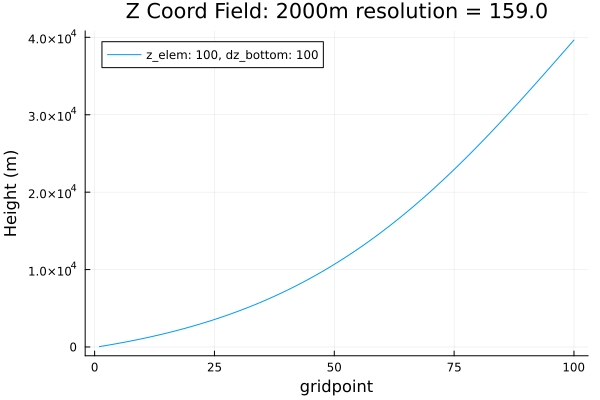

In [181]:
Plots.plot(parent(z)[:, 1,1,1,1], 
    label = "z_elem: $z_elem, dz_bottom: $dz_bottom", 
    xlabel = "gridpoint", 
    ylabel = "Height (m)", 
    title = "Z Coord Field: 2000m resolution = $(find_delta(z))"
)

In [182]:
import Interpolations as Intp

function interp_vertical_prof(x, xp, fp)
    spl = Intp.extrapolate(
        Intp.interpolate((xp,), fp, Intp.Gridded(Intp.Linear())),
        Intp.Flat(),
    )
    return spl(vec(x))
end

interp_vertical_prof (generic function with 1 method)

In [183]:
# interpolate coordinates 
z_elem = 500
dz_bottom = 30
config_dict = YAML.load_file("prognostic_edmfx_gcmdriven_column.yml")
config_dict["z_elem"] = z_elem
config_dict["dz_bottom"] = dz_bottom
config = CA.AtmosConfig(config_dict; job_id = "resolution_test")
simulation = CA.get_simulation(config);
(; integrator) = simulation;
z = Fields.coordinate_field(integrator.u.c).z;
z

[ Info: Running on CPUSingleThreaded.
[ Info: Setting up single-process ClimaAtmos run
[ Info: Running ClimaCore in unthreaded mode.
┌ Info: Making AtmosConfig with config files: 
└    /Users/julianschmitt/Documents/Research/loss/ClimaAtmos.jl/src/solver/../../config/default_configs/default_config.yml
[ Info: Using CAM_SE hyperdiffusion. vorticity_hyperdiffusion_coefficient, scalar_hyperdiffusion_coefficient and divergence_damping_factor in the config will be ignored.
┌ Info: numerics 
│            `energy_upwinding`::`Val{:none}`
│            `tracer_upwinding`::`Val{:none}`
│             `edmfx_upwinding`::`Val{:first_order}`
│     `edmfx_sgsflux_upwinding`::`Val{:none}`
│     `test_dycore_consistency`::`Nothing`
└                     `limiter`::`Nothing`
┌ Info: AtmosModel: 
│ 
│                         `model_config`::`ClimaAtmos.SingleColumnModel`
│                       `moisture_model`::`ClimaAtmos.EquilMoistModel`
│                         `precip_model`::`ClimaAtmos.NoPrecipit

Float32-valued Field:
  Float32[15.0, 45.0694, 75.2781, 105.626, 136.115, 166.744, 197.515, 228.427, 259.482, 290.68  …  38837.6, 38959.9, 39082.3, 39204.6, 39326.9, 39449.3, 39571.7, 39694.0, 39816.4, 39938.8]

In [227]:
z = Fields.coordinate_field(integrator.u.c).z;

parent(z)[:, 1,1,1,1]

500-element Vector{Float32}:
    15.0
    45.069447
    75.27806
   105.62637
   136.11491
   166.74425
   197.5149
   228.42743
   259.48236
   290.68024
     ⋮
 38959.926
 39082.254
 39204.594
 39326.945
 39449.305
 39571.67
 39694.047
 39816.43
 39938.81

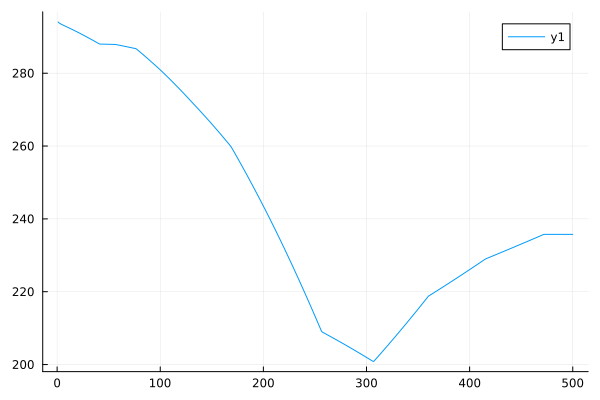

In [198]:
# test data 
simdir = SimDir("output/resolution_exp/resolution_20/output_active/")
da = get(simdir; short_name = "ta")
da = window(da, "time", left = 100 * 3600, right = 150 * 3600)
da = average_time(da)
da = slice(da, x = 0, y = 0)
from_grid = da.dims["z"]
to_grid = parent(z)[:, 1,1,1,1]

# interpolate data
interp_data = interp_vertical_prof(to_grid, from_grid, da.data)
Plots.plot(1:500, interp_data)

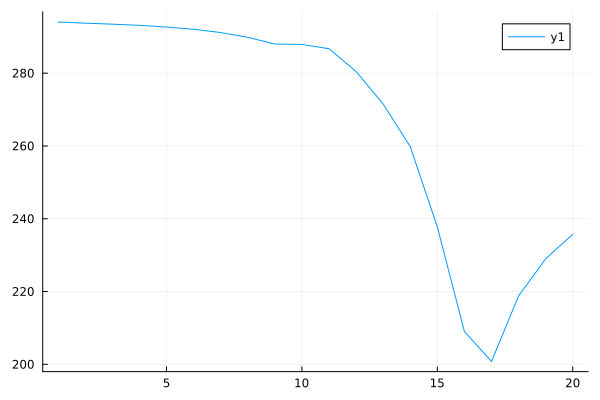

In [199]:
Plots.plot(da.data)

In [219]:
resolution_experiment_data("ta")

hm = heatmap!(ax, resolutions, parent(z)[:, 1,1,1,1], t_dat, colormap = :balance)


Heatmap{Tuple{Vector{Float32}, Vector{Float32}, LinearAlgebra.Transpose{Float32, Matrix{Float32}}}}

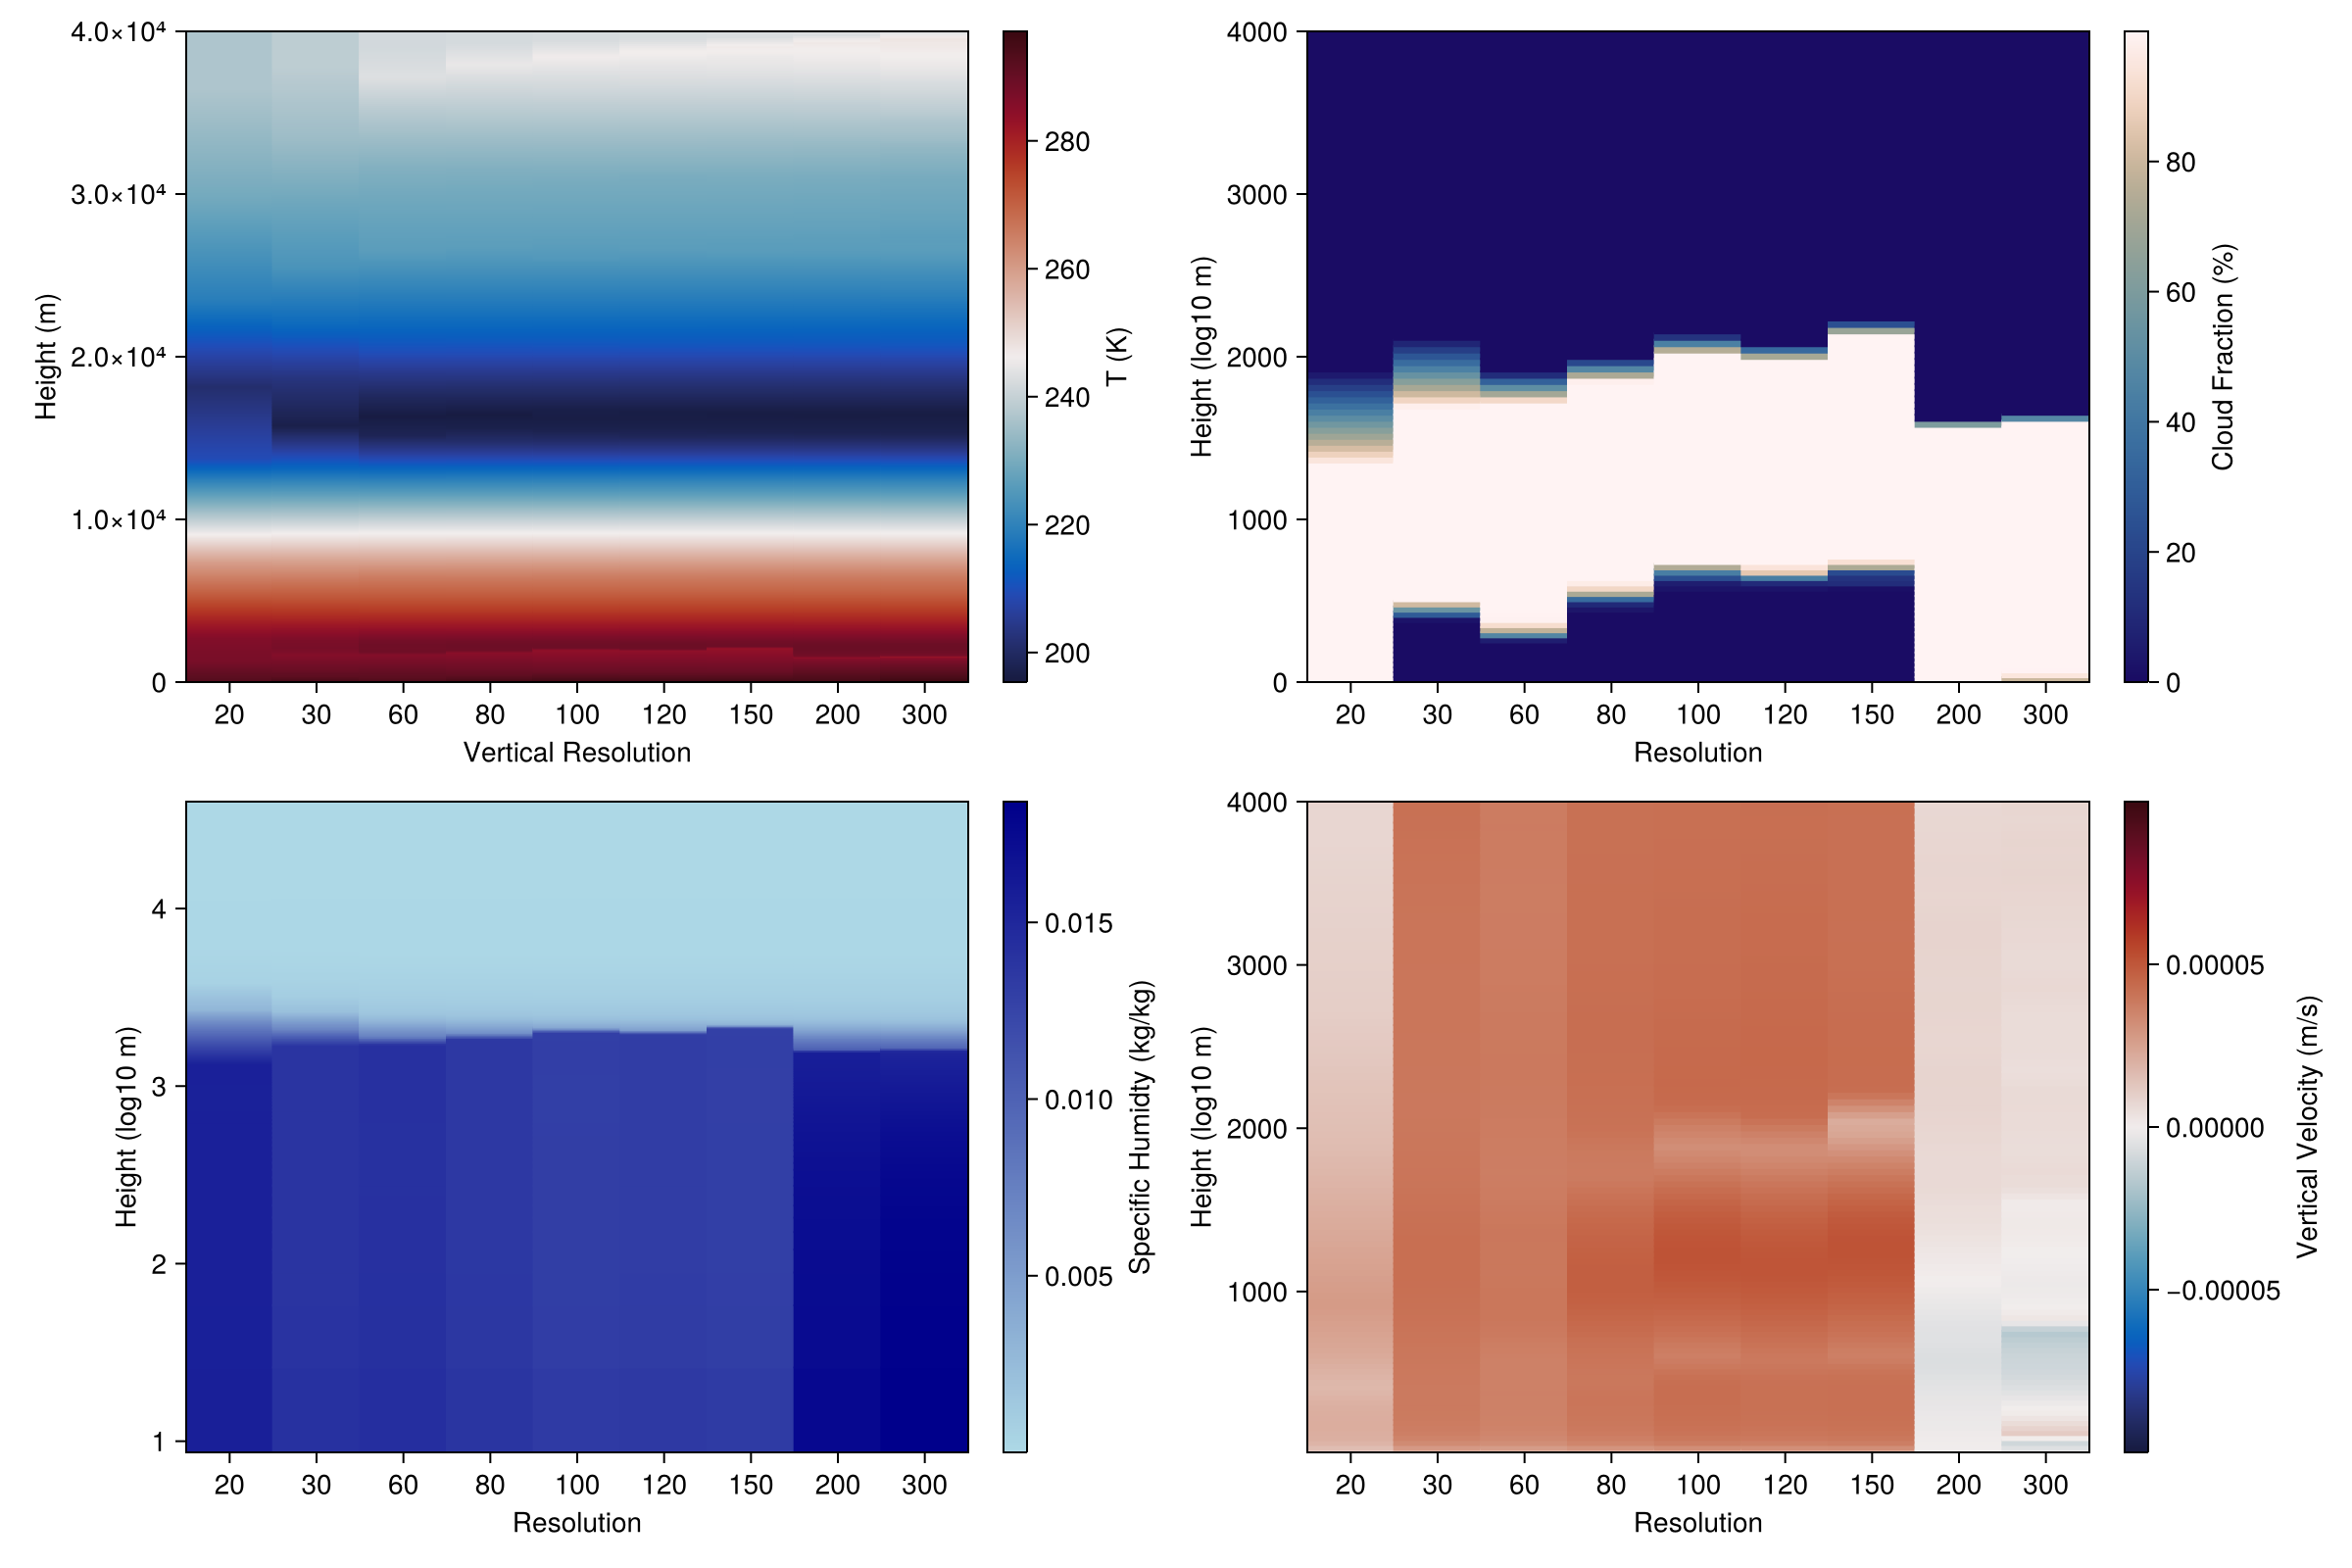

In [309]:
resolutions = [20, 30, 60, 80, 100, 120, 150, 200, 300]
function resolution_experiment_data(var, to_grid = z)
    data = []
    for resolution in resolutions#, 80, 100, 120, 150, 200, 300, 500]         
        simdir = SimDir("output/resolution_exp/resolution_$resolution/output_active/")
        da = get(simdir; short_name = var)
        da = window(da, "time", left = 150 * 3600, right = 200 * 3600)
        da = average_time(da)
        da = slice(da, x = 0, y = 0)
        from_grid = da.dims["z"]
        interp_data = interp_vertical_prof(to_grid, from_grid, da.data)
        push!(data, interp_data)

    end
    return transpose(hcat(data...))
end

fig = Figure(size = (1200, 800))
ax = Axis(fig[1, 1],
    xlabel = "Vertical Resolution",
    ylabel = "Height (m)",
    #yscale = log10,  # Set y-axis to log scale
    xticks = (range(1, length(resolutions)), string.(resolutions))  # Map to equally spaced ticks, label with actual resolution values
)
t_dat = resolution_experiment_data("ta")

# Plot the data (transpose since you want z as vertical and sites as horizontal)
hm = heatmap!(ax, 1:length(resolutions), parent(z)[:, 1,1,1,1], t_dat, colormap = :balance)

# Add colorbar
Colorbar(fig[1, 2], hm, label = "T (K)")

ax = Axis(fig[1, 3],
    xlabel = "Resolution",
    ylabel = "Height (log10 m)",
    xticks = (range(1, length(resolutions)), string.(resolutions)),  # Map to equally spaced ticks, label with actual resolution values
    limits = (nothing, (0, 4000)),
)

cl_dat = resolution_experiment_data("cl")
hm = heatmap!(ax, 1:length(resolutions), parent(z)[:, 1,1,1,1], cl_dat, colormap = :lapaz)
Colorbar(fig[1, 4], hm, label = "Cloud Fraction (%)")

ax = Axis(fig[2, 1],
    xlabel = "Resolution",
    ylabel = "Height (log10 m)",
    xticks = (range(1, length(resolutions)), string.(resolutions))  # Map to equally spaced ticks, label with actual resolution values
)

hus_dat = resolution_experiment_data("hus")
hm = heatmap!(ax, 1:length(resolutions), log10.(parent(z)[:, 1,1,1,1]), hus_dat, colormap = :blues)
Colorbar(fig[2,2], hm, label = "Specific Humidty (kg/kg)")

ax = Axis(fig[2, 3],
    xlabel = "Resolution",
    ylabel = "Height (log10 m)",
    #yscale = Makie.pseudolog10,
    xticks = (range(1, length(resolutions)), string.(resolutions)),  # Map to equally spaced ticks, label with actual resolution values
    limits = (nothing, (15, 4000)),
)

wa_dat = resolution_experiment_data("wa")
hm = heatmap!(ax, 1:length(resolutions), parent(z)[:, 1,1,1,1], wa_dat, colormap = :balance,
    colorrange = (-1e-4, 1e-4)
)
Colorbar(fig[2,4], hm, label = "Vertical Velocity (m/s)")



# Display the plot
fig

In [297]:
parent(z)[:, 1,1,1,1] |> diff

499-element Vector{Float32}:
  30.069447
  30.208614
  30.348312
  30.48854
  30.629333
  30.770645
  30.912537
  31.054932
  31.197876
  31.34137
   ⋮
 122.3125
 122.328125
 122.33984
 122.35156
 122.359375
 122.36719
 122.375
 122.38281
 122.37891

In [296]:
wa_dat |> size

(9, 500)

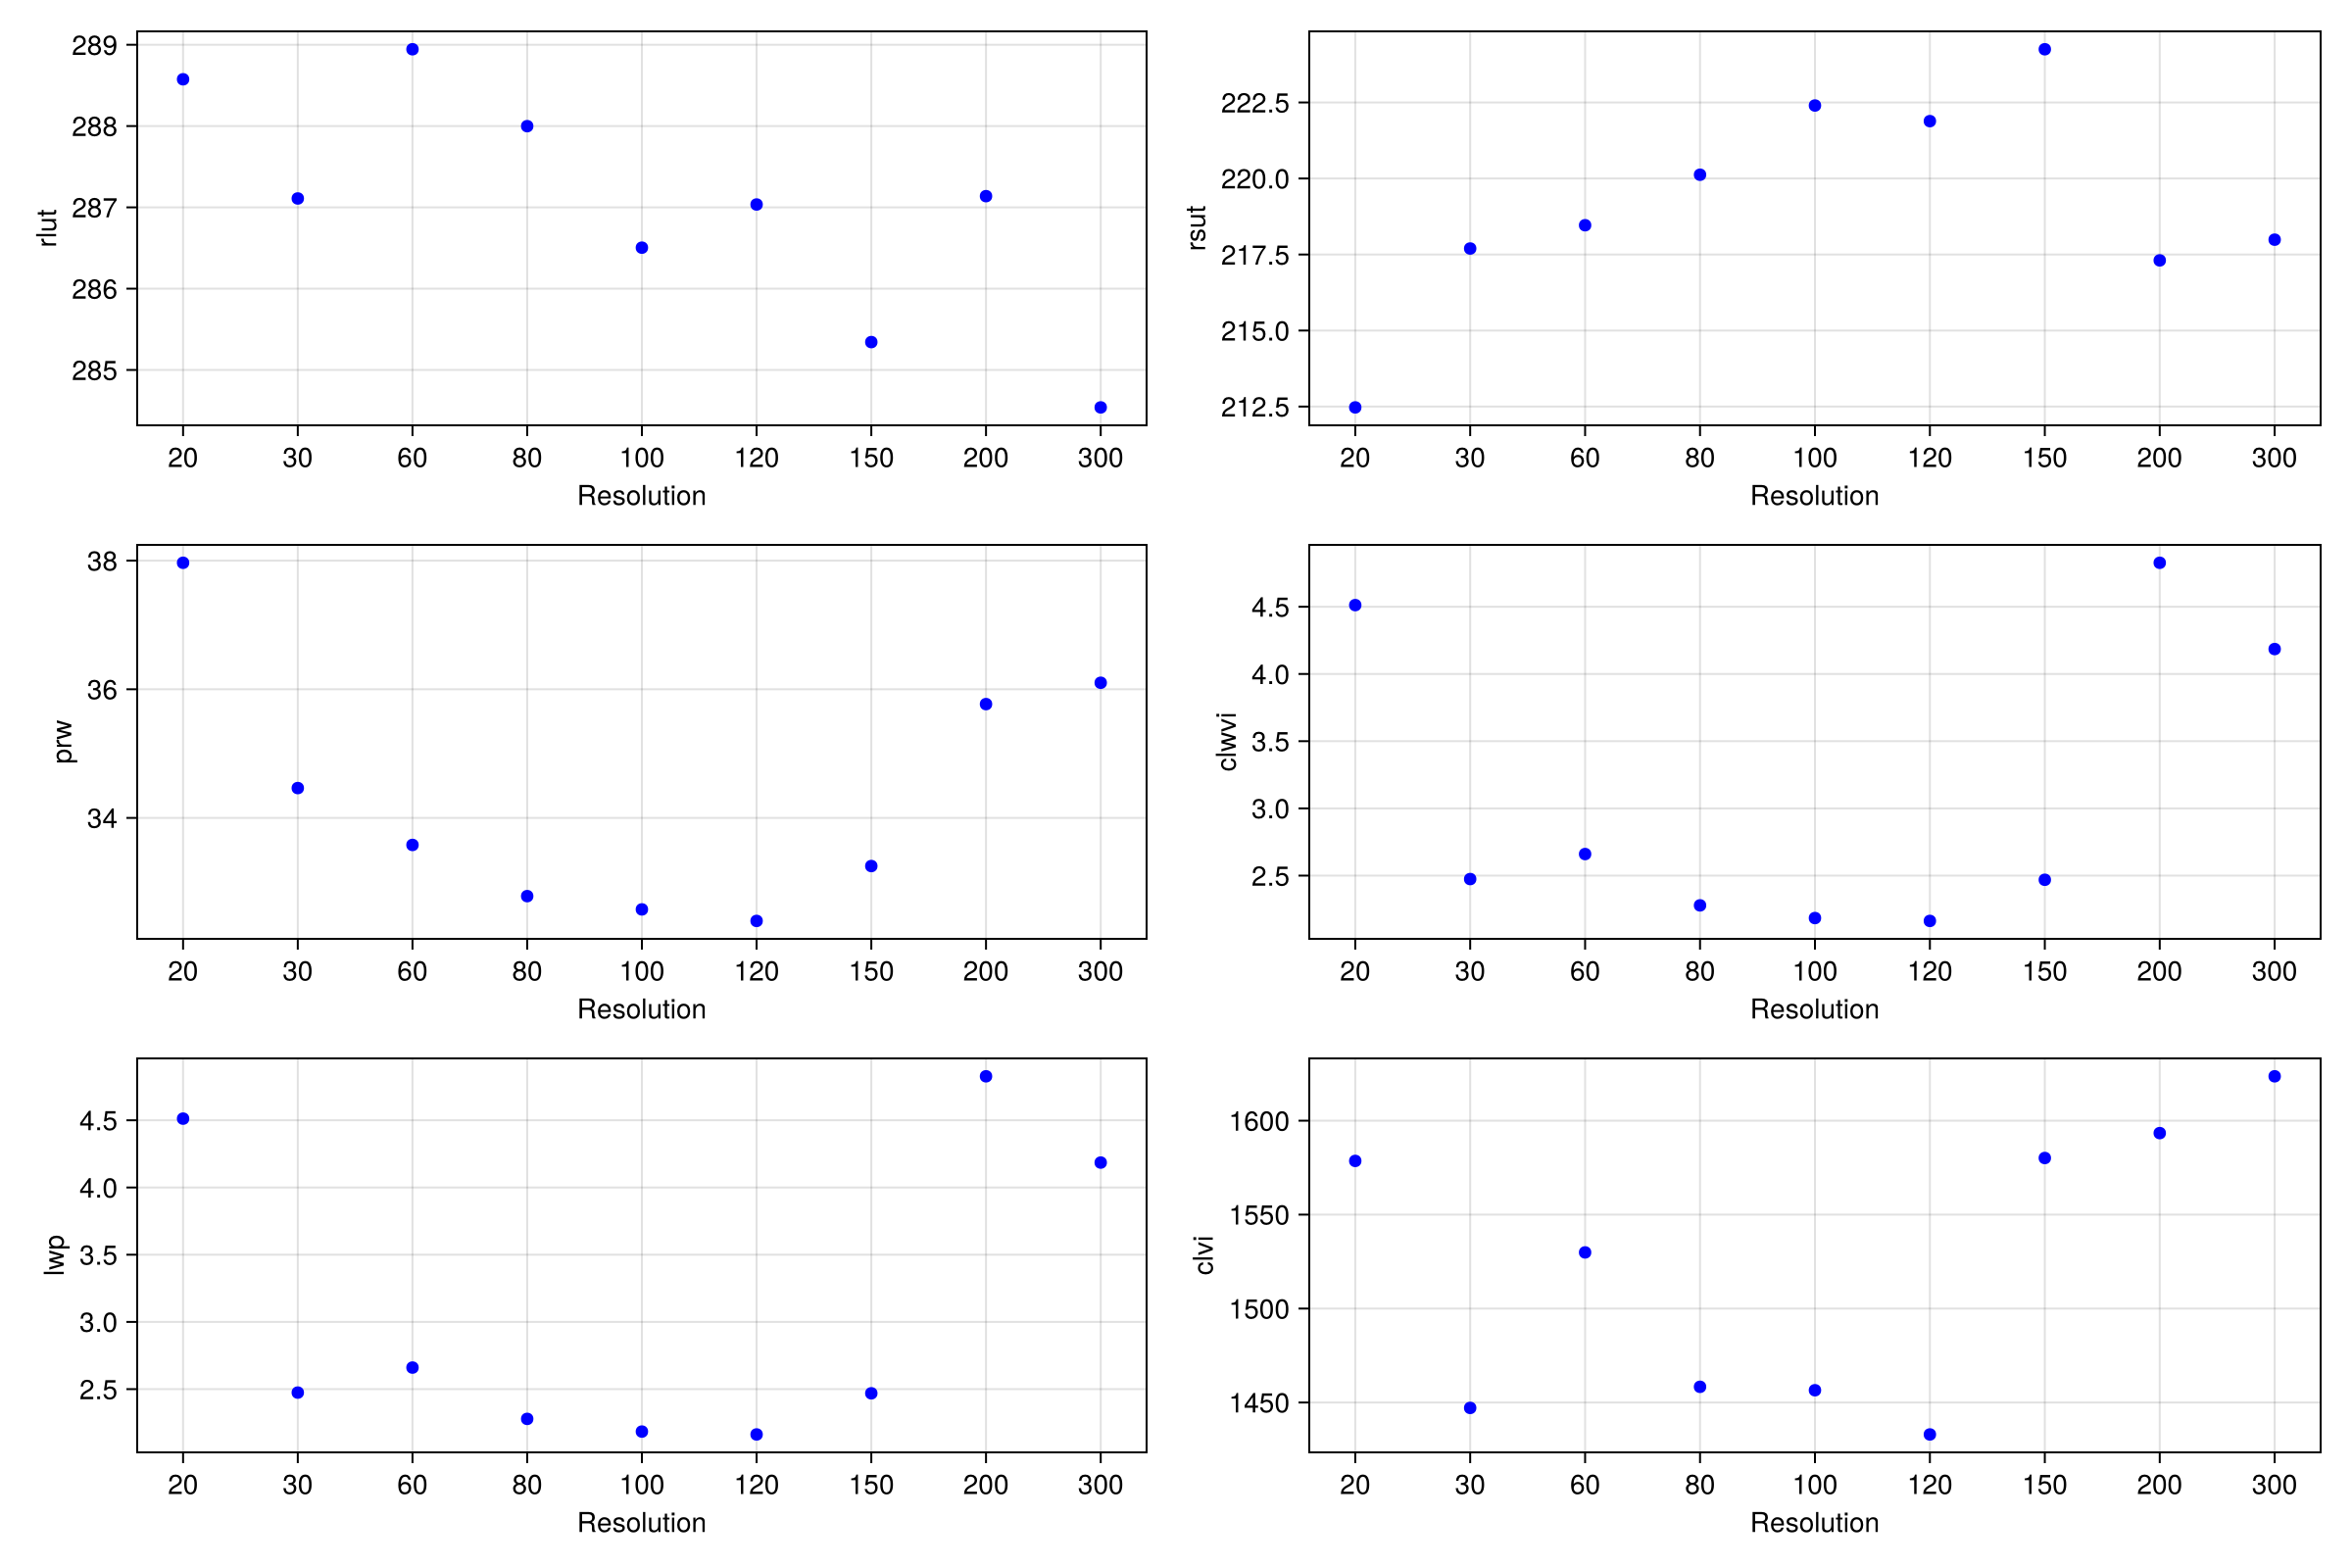

In [289]:
# println(summary(SimDir("output/resolution_exp/resolution_20/output_active/")))

# let's repeat the above but for 1D variables
fig = CairoMakie.Figure(size = (1200, 800))

# Define a function to get 1D variable data
function get_1d_data(var)
    data = []
    for resolution in resolutions
        simdir = SimDir("output/resolution_exp/resolution_$resolution/output_active/")
        da = get(simdir; short_name = var)
        da = window(da, "time", left = 150 * 3600, right = 200 * 3600)
        da = average_time(da)
        push!(data, da.data[1])
    end
    return data
end

# Plot rlut
ax = CairoMakie.Axis(fig[1, 1],
    xlabel = "Resolution",
    ylabel = "rlut",
    xticks = (range(1, length(resolutions)), string.(resolutions))
)
rlut_data = get_1d_data("rlut")
CairoMakie.scatter!(ax, collect(1:length(resolutions)), convert(Array{Float64,1}, rlut_data), label = "rlut", color = :blue)

# Plot rsut
ax = Axis(fig[1, 2],
    xlabel = "Resolution",
    ylabel = "rsut",
    xticks = (range(1, length(resolutions)), string.(resolutions))
)
rsut_data = get_1d_data("rsut")
CairoMakie.scatter!(ax, collect(1:length(resolutions)), convert(Array{Float64,1}, rsut_data), label = "rsut", color = :blue)

# Plot prw
ax = Axis(fig[2, 1],
    xlabel = "Resolution",
    ylabel = "prw",
    xticks = (range(1, length(resolutions)), string.(resolutions))
)
prw_data = get_1d_data("prw")
CairoMakie.scatter!(ax, collect(1:length(resolutions)), convert(Array{Float64,1}, prw_data), label = "prw", color = :blue)

# Plot clwvi
ax = Axis(fig[2, 2],
    xlabel = "Resolution",
    ylabel = "clwvi",
    xticks = (range(1, length(resolutions)), string.(resolutions))
)
clwvi_data = get_1d_data("clwvi")
CairoMakie.scatter!(ax, collect(1:length(resolutions)), convert(Array{Float64,1}, clwvi_data), label = "clwvi", color = :blue)


ax = Axis(fig[3, 1],
    xlabel = "Resolution",
    ylabel = "lwp",
    xticks = (range(1, length(resolutions)), string.(resolutions))
)
clwvi_data = get_1d_data("lwp")
CairoMakie.scatter!(ax, collect(1:length(resolutions)), convert(Array{Float64,1}, clwvi_data), label = "lwp", color = :blue)

ax = Axis(fig[3, 2],
    xlabel = "Resolution",
    ylabel = "clvi",
    xticks = (range(1, length(resolutions)), string.(resolutions))
)
clwvi_data = get_1d_data("clvi")
CairoMakie.scatter!(ax, collect(1:length(resolutions)), convert(Array{Float64,1}, clwvi_data), label = "clvi", color = :blue)

# Display the plot
fig